<a href="https://colab.research.google.com/github/sgadkar2/machine-learning-algorithms/blob/main/GaussianNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

### Generate a three class gaussian data using sklearn.dataset library

In [ ]:
X, y = make_blobs(n_samples = 500, centers = 3, cluster_std = [1.0,1.5,2.0], random_state = 0)

### Plot the generated dataset showing three different classes as three different colored dots in same plot

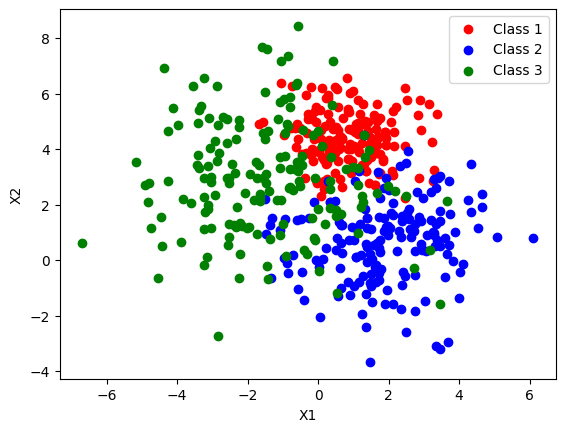

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], c= 'red', label= 'Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], c= 'blue', label= 'Class 2')
plt.scatter(X[y==2, 0], X[y==2, 1], c= 'green', label= 'Class 3')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

### Split the 80:20 Train:Test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### plot the unlabeled train dataset with single color and unlabeled test dataset with another color in same plot

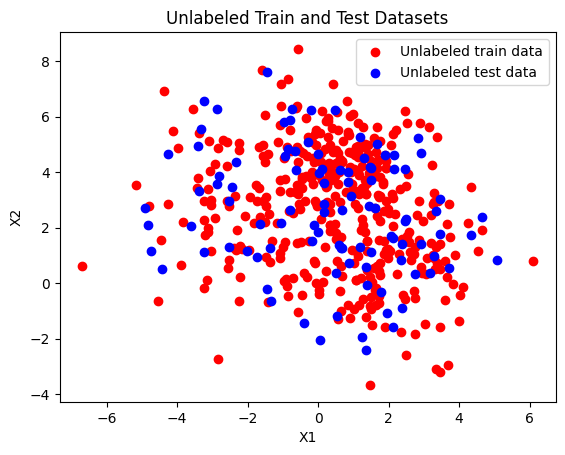

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], color='red', label='Unlabeled train data')
plt.scatter(X_test[:,0], X_test[:,1], color='blue', label='Unlabeled test data')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Unlabeled Train and Test Datasets')
plt.legend()

plt.show()

### Build and apply Naïve Bays algorithm to the train dataset

In [ ]:
class_priors = {}
mean = {}
std = {}
def gaussian_naive_bayes_training(X, y):
  classes = np.unique(y)

  for c in classes:
    X_class = X[y == c]
    class_priors[c] = len(X_class)/len(X)
    mean[c] = np.mean(X_class, axis = 0)
    std[c] = np.std(X_class, axis = 0)

In [ ]:
def gaussian_naive_bayes_predict(X, y):
  classes = np.unique(y)
  y_pred = []
  for i in range(len(X)):
    class_probs = []
    for j in range(len(classes)):
      class_probs.append((1/(np.sqrt(2*np.pi)*std[j])*np.exp(-(((X[i]-mean[j])**2)/(2 * std[j]**2)))).prod()*class_priors[j])

    class_probs = np.array(class_probs)
    y_pred.append(class_probs)

  return np.array(y_pred)

### Test your model and report the accuracy of test data

In [ ]:
#Training model on train data
gaussian_naive_bayes_training(X_train, y_train)

#Testing trained model on test data
y_prediction = gaussian_naive_bayes_predict(X_test, y_test)
y_pred = y_prediction.argmax(axis = 1)

accuracy = np.sum(y_pred == y_test) * 100/ len(y_test)
print(f'Test Accuracy: {accuracy:.4f}%')

Test Accuracy: 84.0000%
